In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
%matplotlib inline
%pylab inline
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
train.isna().sum()


Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [5]:
train.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [6]:
train.shape

(3333, 21)

In [7]:
test.shape

(1667, 21)

# Preparando Variavel target 

In [8]:
def transformar_target(valor):
    if valor == 'yes':
        return 1
    else:
        return 0
train['target'] = train['churn'].map(transformar_target)
test['target'] = train['churn'].map(transformar_target)




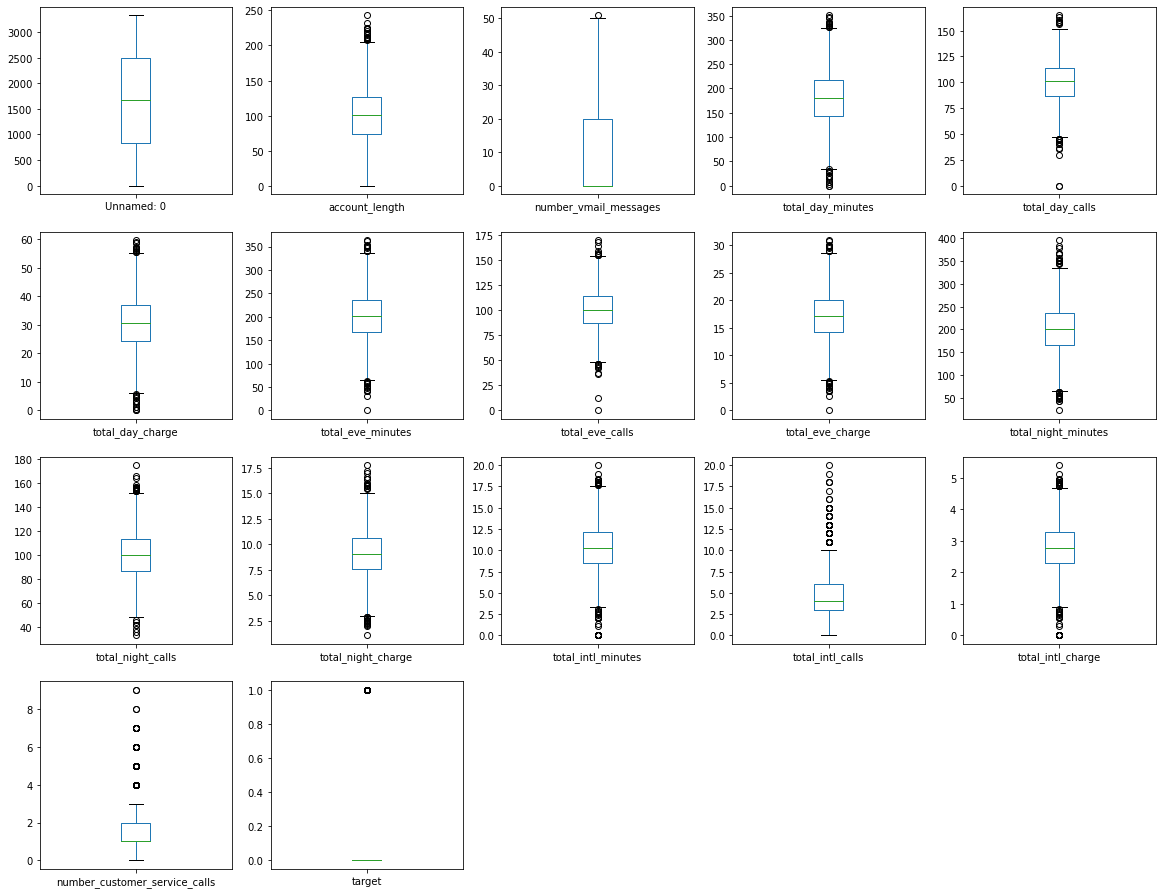

In [9]:
train.plot(kind = 'box', subplots = True, layout = (5,5), figsize=(20,20), sharex = False, sharey = False)
plt.show()

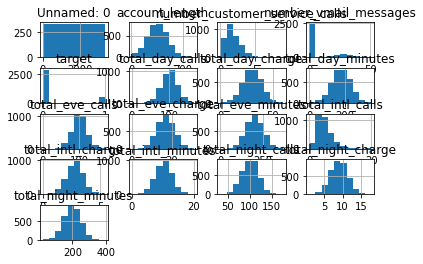

In [10]:
# Histograma Univariado
train.hist()
plt.show()

In [11]:
train.corr(method = 'pearson')

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
Unnamed: 0,1.000000,0.036667,-0.018086,-0.020769,0.000272,-0.020769,0.013872,0.009149,0.013875,0.011295,0.000995,0.011311,0.005822,-0.011221,0.005780,0.009665,0.040232
account_length,0.036667,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
number_vmail_messages,-0.018086,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,-0.020769,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.000272,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,-0.020769,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,0.013872,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.009149,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,0.013875,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,0.011295,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [12]:
# Normalizando os dados (comprimento igual a 1)
from pandas import read_csv
from sklearn.preprocessing import Normalizer

variaveis = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
             'total_eve_minutes','total_eve_calls',
             'total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
             'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

y = train['target']
x = train[variaveis]
y_test = test['target']
x_test = test[variaveis]
array = x

# Separando o array em componentes de input e output



# Gerando os dados normalizados
scaler = Normalizer().fit(x)
normalizedX = scaler.transform(x)

# Gerando os dados normalizados
scaler = Normalizer().fit(x_test)
normalizedXtest = scaler.transform(x_test)

# Sumarizando os dados transformados

print("\nDados Normalizados: \n\n", normalizedX)


Dados Normalizados: 

 [[0.27360345 0.05343817 0.5666584  ... 0.00641258 0.00577132 0.00213753]
 [0.25297595 0.06147079 0.38206462 ... 0.00709278 0.00874777 0.00236426]
 [0.34563641 0.         0.61407227 ... 0.01261447 0.00830032 0.        ]
 ...
 [0.06616126 0.         0.42721273 ... 0.01417741 0.00900266 0.0047258 ]
 [0.45583011 0.         0.52965477 ... 0.02477338 0.00334441 0.00495468]
 [0.15853523 0.0535592  0.50217106 ... 0.00856947 0.00792676 0.        ]]


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.855072 (0.026752)
LDA: 0.853576 (0.022401)
NB: 0.855679 (0.018773)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.841574 (0.028134)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.818486 (0.010424)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.855072 (0.026752)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBC: 0.889586 (0.014094)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.897685 (0.020006)


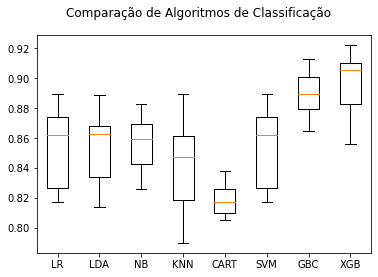

In [13]:


# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('GBC',GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)))
modelos.append(('XGB', XGBClassifier()))



# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, normalizedX , y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [14]:
new_models_dataframe2=pd.DataFrame(resultados,index=nomes)   
new_models_dataframe2['mean'] = new_models_dataframe2.mean(axis=1)
new_models_dataframe2['mean']

LR      0.855072
LDA     0.853576
NB      0.855679
KNN     0.841574
CART    0.818486
SVM     0.855072
GBC     0.889586
XGB     0.897685
Name: mean, dtype: float64

Como o XGB foi o melho modelo, irei testa-lo no data set de test
Primeiro resultado foi de 81,22%


In [15]:
acc = []
nome_model = []
# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(normalizedX, y)


# Fazendo previsões
y_pred = modelo.predict(normalizedXtest)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_test, previsoes)
acc.append(accuracy)
nome_model.append('XGb1')
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 81.64%


In [16]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1662    1
1663    0
1664    0
1665    0
1666    0
Name: target, Length: 1667, dtype: int64

In [17]:
len(previsoes)

1667

In [18]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])
pred = pd.Categorical(list(np.where(np.array(previsoes) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=False, margins_name="Total")

Actual,Churn,non-churn
pred,,
Churn,13,108
non-churn,198,1348


In [19]:
# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(normalizedX, y)


# Fazendo previsões
y_pred = modelo.predict(normalizedXtest)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_test, previsoes)
acc.append(accuracy)
nome_model.append('lr1')
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 87.34%


In [20]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])
pred = pd.Categorical(list(np.where(np.array(previsoes) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=False, margins_name="Total")

Actual,Churn,non-churn
pred,,
non-churn,211,1456


# Analisando Variaveis descritivas

In [21]:
# Distribuição das state
train.groupby('state').size()

state
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
dtype: int64

In [22]:
# Distribuição das area_code
train.groupby('area_code').size()

area_code
area_code_408     838
area_code_415    1655
area_code_510     840
dtype: int64

In [23]:
# Distribuição das international_plan
train.groupby('international_plan').size()

international_plan
no     3010
yes     323
dtype: int64

In [24]:

# Distribuição das voice_mail_plan
train.groupby('voice_mail_plan').size()

voice_mail_plan
no     2411
yes     922
dtype: int64

Com a analise acima, irei tranformar as variaveis, area_code, internatinal_plan e voice_mail_plan para variaveis quantitativas

In [25]:

train['voice_mail_plan_numerica'] = train['voice_mail_plan'].map(transformar_target)
test['voice_mail_plan_numerica'] = train['voice_mail_plan'].map(transformar_target)

In [26]:

train['international_plan_numerica'] = train['international_plan'].map(transformar_target)
test['international_plan_numerica'] = train['international_plan'].map(transformar_target)

In [27]:
train['area_code_408'] = train['area_code'].str.contains("408").astype(int)
train['area_code_415'] = train['area_code'].str.contains("415").astype(int)
train['area_code_510'] = train['area_code'].str.contains("510").astype(int)

In [28]:
test['area_code_408'] = train['area_code'].str.contains("408").astype(int)
test['area_code_415'] = train['area_code'].str.contains("415").astype(int)
test['area_code_510'] = train['area_code'].str.contains("510").astype(int)

In [29]:
# Normalizando os dados (comprimento igual a 1)
from pandas import read_csv
from sklearn.preprocessing import Normalizer

variaveis = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
             'total_eve_minutes','total_eve_calls',
             'total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
             'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'area_code_408', 'area_code_415',
             'area_code_510', 'international_plan_numerica', 'voice_mail_plan_numerica']

y = train['target']
x = train[variaveis]
y_test = test['target']
x_test = test[variaveis]


array = x

# Separando o array em componentes de input e output



# Gerando os dados normalizados
scaler = Normalizer().fit(x)
normalizedX = scaler.transform(x)



# Gerando os dados normalizados
scaler = Normalizer().fit(x_test)
normalizedXtest = scaler.transform(x_test)
# Sumarizando os dados transformados

print("\nDados Normalizados: \n\n", normalizedX)


Dados Normalizados: 

 [[0.2736022  0.05343793 0.56665581 ... 0.         0.         0.00213752]
 [0.25297454 0.06147045 0.38206248 ... 0.         0.         0.00236425]
 [0.34563531 0.         0.61407032 ... 0.         0.         0.        ]
 ...
 [0.06616108 0.         0.42721154 ... 0.0023629  0.         0.        ]
 [0.45582731 0.         0.52965152 ... 0.00247732 0.00247732 0.        ]
 [0.15853451 0.05355895 0.50216876 ... 0.         0.         0.00214236]]


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.855072 (0.026752)
LDA: 0.854171 (0.018027)
NB: 0.844878 (0.014462)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.841574 (0.028134)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.901582 (0.018530)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.855072 (0.026752)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBC: 0.925582 (0.015516)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.938487 (0.013538)


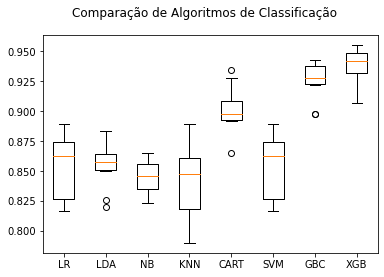

In [30]:


# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('GBC',GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)))
modelos.append(('XGB', XGBClassifier()))



# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, normalizedX, y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [31]:
new_models_dataframe2=pd.DataFrame(resultados,index=nomes)   
new_models_dataframe2['mean'] = new_models_dataframe2.mean(axis=1)
new_models_dataframe2['mean']

LR      0.855072
LDA     0.854171
NB      0.844878
KNN     0.841574
CART    0.901582
SVM     0.855072
GBC     0.925582
XGB     0.938487
Name: mean, dtype: float64

In [32]:

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(normalizedX, y)


# Fazendo previsões
y_pred = modelo.predict(normalizedXtest)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_test, previsoes)
acc.append(accuracy)
nome_model.append('XGB2')
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 79.90%


In [33]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])
pred = pd.Categorical(list(np.where(np.array(previsoes) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=False, margins_name="Total")

Actual,Churn,non-churn
pred,,
Churn,28,152
non-churn,183,1304


In [34]:

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(normalizedX, y)


# Fazendo previsões
y_pred = modelo.predict(normalizedXtest)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_test, previsoes)
acc.append(accuracy)
nome_model.append('lr2')
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 87.34%


In [35]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])
pred = pd.Categorical(list(np.where(np.array(previsoes) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=False, margins_name="Total")

Actual,Churn,non-churn
pred,,
non-churn,211,1456


Apesar do XGB ser o melhor na comparação de treinamento, a regreção logistica apresentou um melhor resultado nos dados de test, ou seja
ela esta mais generalizada para receber novos dados

In [36]:
train.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target,voice_mail_plan_numerica,international_plan_numerica,area_code_408,area_code_415,area_code_510
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1667.00000,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,...,10.237294,4.479448,2.764581,1.562856,0.144914,0.276628,0.096910,0.251425,0.496550,0.252025
std,962.29855,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,...,2.791840,2.461214,0.753773,1.315491,0.352067,0.447398,0.295879,0.433897,0.500063,0.434241
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,834.00000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,...,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1667.00000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,...,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2500.00000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,...,12.100000,6.000000,3.270000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3333.00000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,...,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Treinar modelo com as melho variaveis de acondo com o metodo de eliminação recursiva

In [37]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 5)
fit = rfe.fit(x, y)

# Print dos resultados
print("Variáveis Preditoras:",x.columns)
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)




NameError: name 'RFE' is not defined

In [38]:
# Normalizando os dados (comprimento igual a 1)
from pandas import read_csv
from sklearn.preprocessing import Normalizer

variaveis = ['total_intl_calls', 'number_customer_service_calls', 
             'area_code_510', 'international_plan_numerica', 'voice_mail_plan_numerica']

y = train['target']
x = train[variaveis]
y_test = test['target']
x_test = test[variaveis]


array = x

# Separando o array em componentes de input e output



# Gerando os dados normalizados
scaler = Normalizer().fit(x)
normalizedX = scaler.transform(x)



# Gerando os dados normalizados
scaler = Normalizer().fit(x_test)
normalizedXtest = scaler.transform(x_test)
# Sumarizando os dados transformados

print("\nDados Normalizados: \n\n", normalizedX)


Dados Normalizados: 

 [[0.90453403 0.30151134 0.         0.         0.30151134]
 [0.90453403 0.30151134 0.         0.         0.30151134]
 [1.         0.         0.         0.         0.        ]
 ...
 [0.93704257 0.31234752 0.15617376 0.         0.        ]
 [0.97128586 0.19425717 0.09712859 0.09712859 0.        ]
 [0.9701425  0.         0.         0.         0.24253563]]


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should

LR: 0.865876 (0.024148)
LDA: 0.853577 (0.019268)
NB: 0.837680 (0.017140)
KNN: 0.867685 (0.020252)
CART: 0.873980 (0.015542)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



SVM: 0.867676 (0.025219)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBC: 0.875480 (0.021024)


D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.873382 (0.018130)


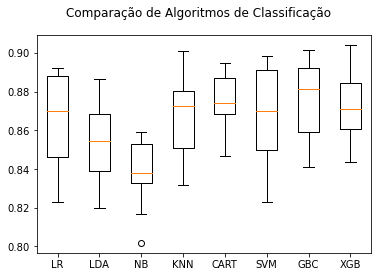

In [39]:

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('GBC',GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)))
modelos.append(('XGB', XGBClassifier()))



# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, normalizedX, y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [40]:
new_models_dataframe2=pd.DataFrame(resultados,index=nomes)   
new_models_dataframe2['mean'] = new_models_dataframe2.mean(axis=1)
new_models_dataframe2['mean']

LR      0.865876
LDA     0.853577
NB      0.837680
KNN     0.867685
CART    0.873980
SVM     0.867676
GBC     0.875480
XGB     0.873382
Name: mean, dtype: float64

In [41]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
# Criando o modelo
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Treinando o modelo
modelo.fit(normalizedX, y)


# Fazendo previsões
y_pred = modelo.predict(normalizedXtest)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_test, previsoes)
acc.append(accuracy)
nome_model.append('GCB1')
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 85.42%


In [42]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])
pred = pd.Categorical(list(np.where(np.array(previsoes) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=False, margins_name="Total")

Actual,Churn,non-churn
pred,,
Churn,19,51
non-churn,192,1405


In [43]:

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(normalizedX, y)


# Fazendo previsões
y_pred = modelo.predict(normalizedXtest)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_test, previsoes)
acc.append(accuracy)
nome_model.append('lr3')
print("Acurácia: %.2f%%" % (accuracy * 100.0))

Acurácia: 86.38%


In [44]:
true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])
pred = pd.Categorical(list(np.where(np.array(previsoes) == 1, 'Churn','non-churn')), categories = ['Churn','non-churn'])

pd.crosstab(pred, true, 
            rownames=['pred'], 
            colnames=['Actual'], margins=False, margins_name="Total")

Actual,Churn,non-churn
pred,,
Churn,15,31
non-churn,196,1425


Com o metodo de eliminação recursiva, conseguimos o mesmo resultado com a regreção logistica, porem desta vez o GCB foi melhor nos teste, e apresentou um resultado bem satifatorio com novos dados

In [45]:
Resultado_final=pd.DataFrame(acc,index=nome_model)  

In [46]:
Resultado_final

,0
XGb1,0.816437
lr1,0.873425
XGB2,0.799040
lr2,0.873425
GCB1,0.854229
lr3,0.863827


O melhor desenpenho foi apresentado pela regreção logistica sem a eliminação recrusiva, porem o Gradient Boost tenho um otimo desempenho,
abaixo tentarei algumas tecnicas de tunar hiperparametro

In [213]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

def transformar_target(valor):
    if valor == 'yes':
        return 1
    else:
        return 0
train['target'] = train['churn'].map(transformar_target)
test['target'] = train['churn'].map(transformar_target)

In [214]:

from sklearn.preprocessing import Normalizer

variaveis = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
             'total_eve_minutes','total_eve_calls',
             'total_eve_charge','total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
             'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

y = train['target']
x = train[variaveis]
y_test = test['target']
x_test = test[variaveis]
array = x

# Separando o array em componentes de input e output



# Gerando os dados normalizados
scaler = Normalizer().fit(x)
normalizedX = scaler.transform(x)

# Gerando os dados normalizados
scaler = Normalizer().fit(x_test)
normalizedXtest = scaler.transform(x_test)

# Sumarizando os dados transformados

print("\nDados Normalizados: \n\n", normalizedX)


Dados Normalizados: 

 [[0.27360345 0.05343817 0.5666584  ... 0.00641258 0.00577132 0.00213753]
 [0.25297595 0.06147079 0.38206462 ... 0.00709278 0.00874777 0.00236426]
 [0.34563641 0.         0.61407227 ... 0.01261447 0.00830032 0.        ]
 ...
 [0.06616126 0.         0.42721273 ... 0.01417741 0.00900266 0.0047258 ]
 [0.45583011 0.         0.52965477 ... 0.02477338 0.00334441 0.00495468]
 [0.15853523 0.0535592  0.50217106 ... 0.00856947 0.00792676 0.        ]]


In [218]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


# Definindo os valores que serão testados
seed = 7
iterations = 50

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000], 'max_iter': [50,100,150]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(normalizedX, y)

# Print dos resultados
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 42 is smaller than n_iter=50. Running 42 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports o

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

Acurácia: 85.509
Melhores Parâmetros do Modelo:
 LogisticRegression(C=1000, max_iter=50)


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
